# 📊 Marketing Campaign Analysis 

This notebook covers:
- Data loading
- Data cleaning & preprocessing
- Feature engineering
- Exploratory Data Analysis (EDA)
- Visualizations similar to the dashboard shared
- Advanced Seaborn visualizations
- Predictive modeling (Logistic Regression & Boosting)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier

plt.rcParams['figure.figsize'] = (10,6)
sns.set_theme(style='whitegrid')

## 1️⃣ Load Dataset

In [2]:
df = pd.read_csv('bank/bank-full.csv', sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## 2️⃣ Basic Data Inspection

In [3]:
df.shape
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## 3️⃣ Data Cleaning

In [4]:
# Check missing values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

- Dataset has no nulls
- Convert categorical yes/no to binary where needed

In [5]:
binary_cols = ['default','housing','loan','y']
for col in binary_cols:
    df[col] = df[col].map({'yes':1, 'no':0})

## 4️⃣ Feature Engineering

In [6]:
# Age Groups
bins = [17,25,40,55,68,100]
labels = ['18-25','26-40','41-55','56-68','>69']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

# Call Duration Groups
dur_bins = [0,120,420,900,5000]
dur_labels = ['0-2 mins','3-7 mins','8-15 mins','>15 mins']
df['duration_group'] = pd.cut(df['duration'], bins=dur_bins, labels=dur_labels)

## 5️⃣ Overall Campaign Response

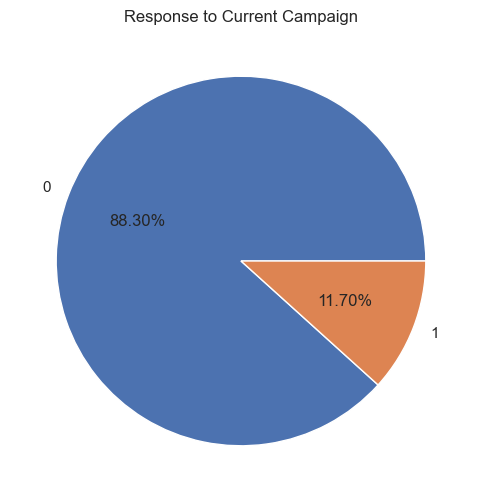

In [7]:
df['y'].value_counts(normalize=True).plot(kind='pie', autopct='%1.2f%%')
plt.title('Response to Current Campaign')
plt.ylabel('')
plt.show()

## 6️⃣ Response by Call Duration

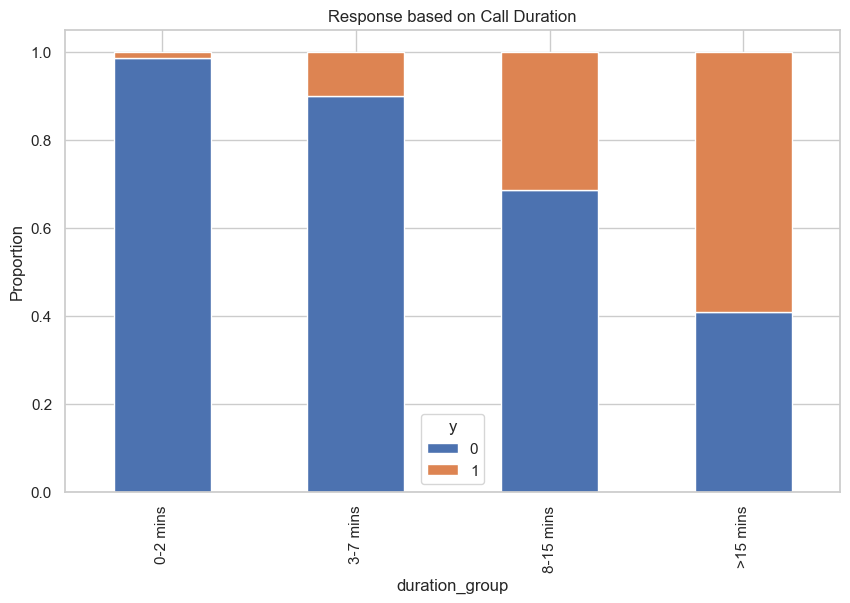

In [8]:
pd.crosstab(df['duration_group'], df['y'], normalize='index').plot(kind='bar', stacked=True)
plt.title('Response based on Call Duration')
plt.ylabel('Proportion')
plt.show()

## 7️⃣ Loan & Housing Impact

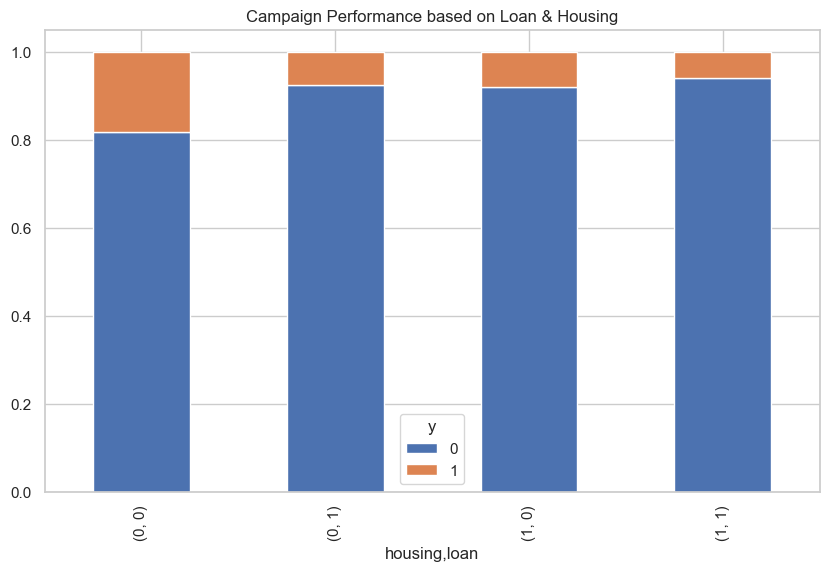

In [9]:
pd.crosstab([df['housing'], df['loan']], df['y'], normalize='index').plot(kind='bar', stacked=True)
plt.title('Campaign Performance based on Loan & Housing')
plt.show()

## 8️⃣ Age Group vs Response

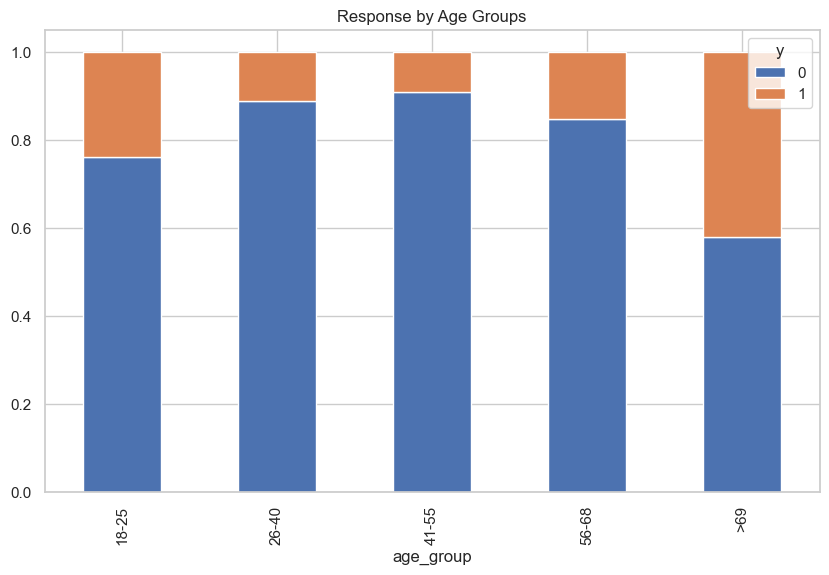

In [10]:
pd.crosstab(df['age_group'], df['y'], normalize='index').plot(kind='bar', stacked=True)
plt.title('Response by Age Groups')
plt.show()

## 9️⃣ Education Impact (Positive Responses Only)

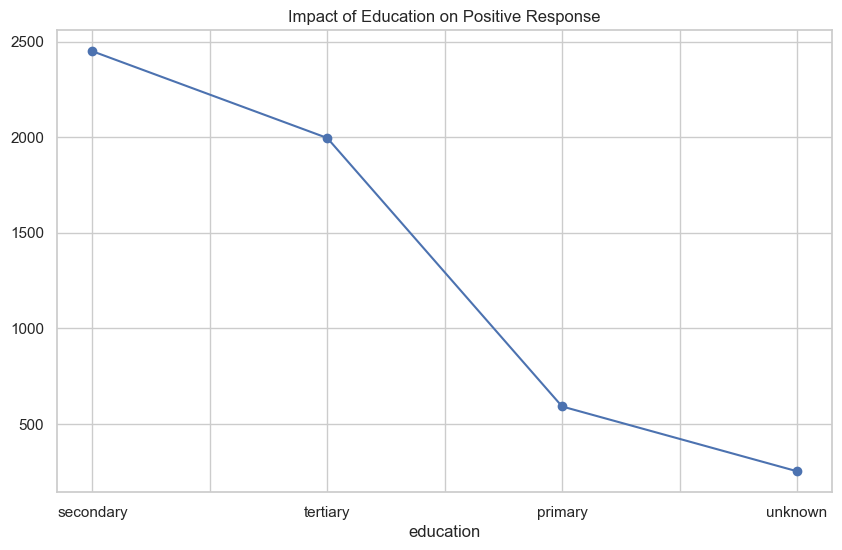

In [11]:
df_yes = df[df['y']==1]
df_yes['education'].value_counts().plot(kind='line', marker='o')
plt.title('Impact of Education on Positive Response')
plt.show()

## 🔟 Month-wise Campaign Trend

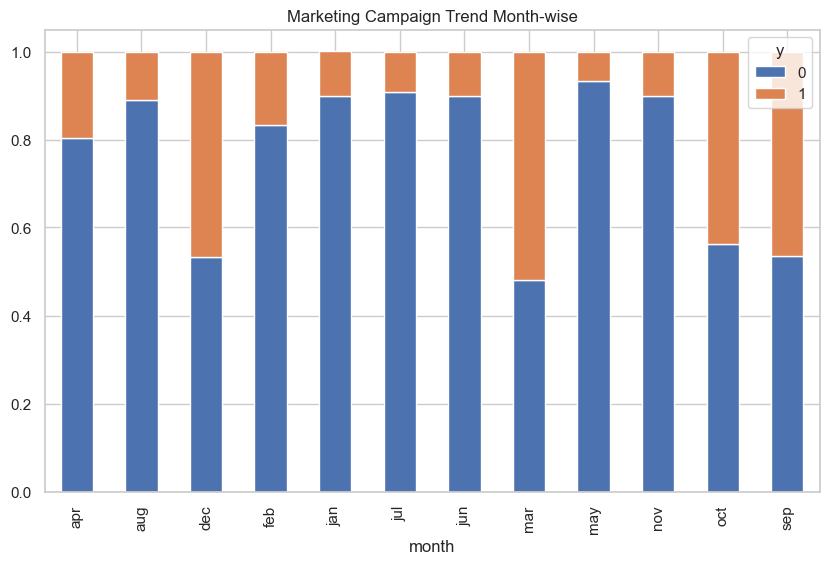

In [12]:
pd.crosstab(df['month'], df['y'], normalize='index').plot(kind='bar', stacked=True)
plt.title('Marketing Campaign Trend Month-wise')
plt.show()

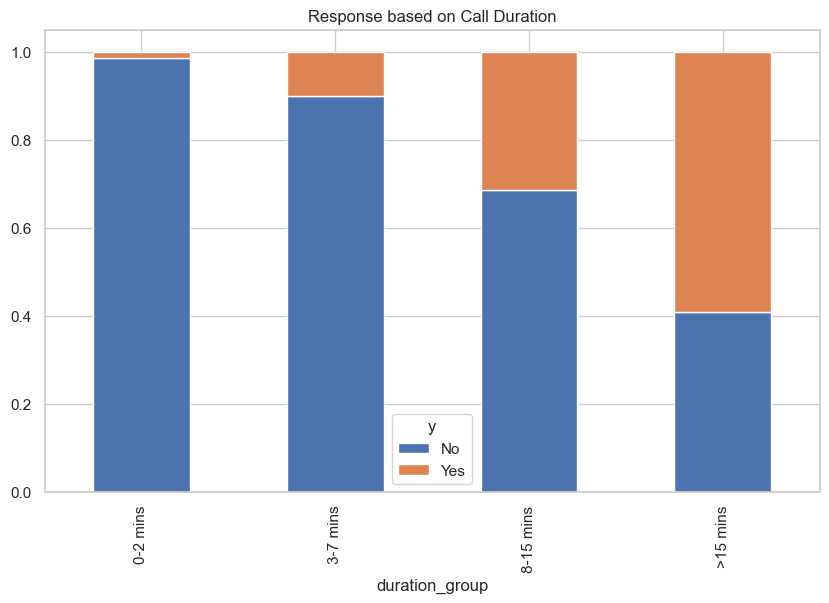

In [13]:
# Response by Call Duration (Stacked)
pd.crosstab(df['duration_group'], df['y'], normalize='index')\
    .rename(columns={0:'No',1:'Yes'})\
    .plot(kind='bar', stacked=True)
plt.title('Response based on Call Duration')
plt.show()

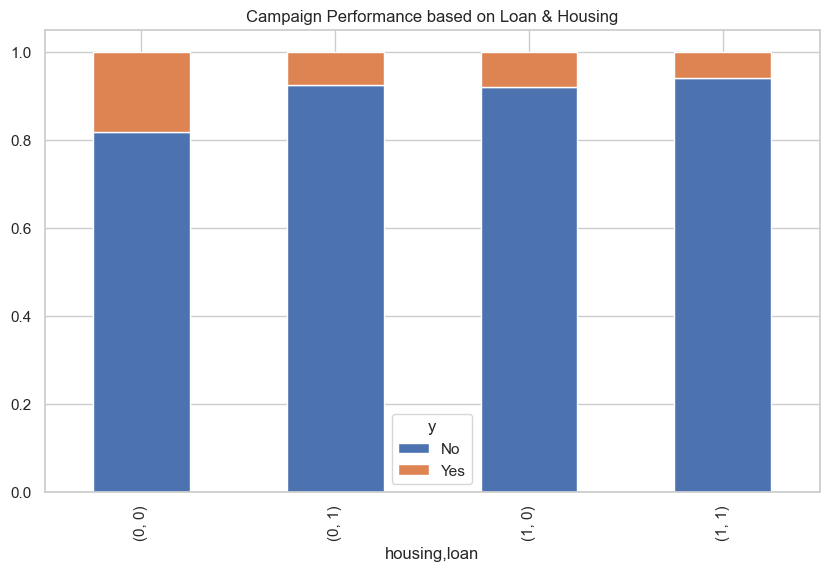

In [14]:
# Loan & Housing Impact
pd.crosstab([df['housing'], df['loan']], df['y'], normalize='index')\
    .rename(columns={0:'No',1:'Yes'})\
    .plot(kind='bar', stacked=True)
plt.title('Campaign Performance based on Loan & Housing')
plt.show()

## Advanced Seaborn Visuals

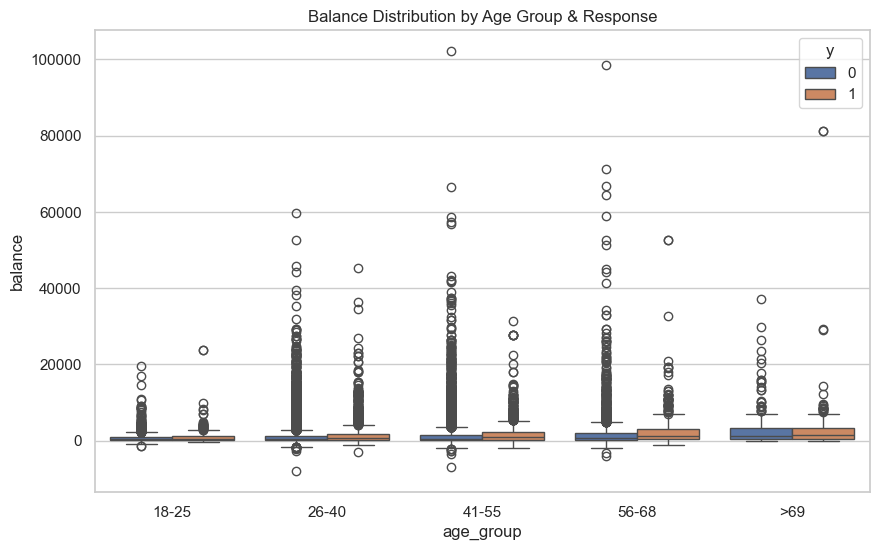

In [15]:
# Salary vs Age vs Response
sns.boxplot(data=df, x='age_group', y='balance', hue='y')
plt.title('Balance Distribution by Age Group & Response')
plt.show()

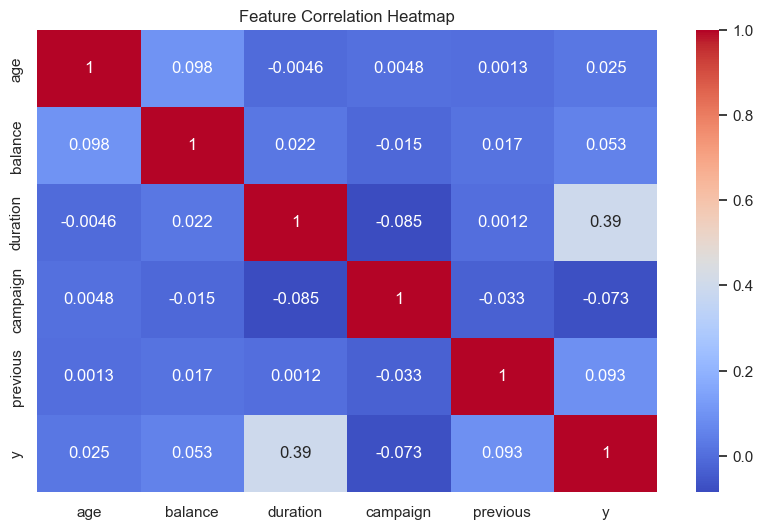

In [16]:
# Heatmap: Correlation
corr = df[['age','balance','duration','campaign','previous','y']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

##  Predictive Modeling

In [17]:
# Prepare data
features = ['age','balance','duration','campaign','previous','housing','loan','default']
X = df[features]
y = df['y']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

In [18]:
# Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)

print(classification_report(y_test, y_pred))
print('ROC-AUC:', roc_auc_score(y_test, log_model.predict_proba(X_test)[:,1]))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11977
           1       0.56      0.17      0.26      1587

    accuracy                           0.89     13564
   macro avg       0.73      0.58      0.60     13564
weighted avg       0.86      0.89      0.86     13564

ROC-AUC: 0.8583375961245612


In [19]:
# Gradient Boosting (XGBoost alternative)
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)

print(classification_report(y_test, gb_pred))
print('ROC-AUC:', roc_auc_score(y_test, gb.predict_proba(X_test)[:,1]))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     11977
           1       0.57      0.32      0.41      1587

    accuracy                           0.89     13564
   macro avg       0.74      0.64      0.67     13564
weighted avg       0.87      0.89      0.88     13564

ROC-AUC: 0.8854103846066228
